<a href="https://colab.research.google.com/github/davidest1995/Data-Science/blob/main/Probabilidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io

In [2]:
import numpy as np
import pandas as pd
from numpy.random import binomial
from scipy.stats import binom
from scipy.stats import norm
from math import factorial
import matplotlib.pyplot as plt

## Ecuación distribución binomial


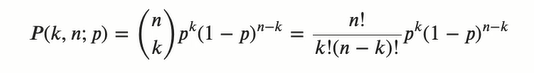

In [3]:
def binomial_distribution(number_successes,number_attemps,probability_success):
  return (factorial(number_attemps)/(factorial(number_successes)*factorial(number_attemps-number_successes)))*pow(probability_success,number_successes)*pow(1-probability_success,number_attemps-number_successes)


In [41]:
## La ecuación anterior se puede calcular de forma sencilla con python así:

dist = binom(5,0.5)
dist.pmf(3) # Densidad de probabilidad (probability mass function)

0.31249999999999983

## Ejercicio

cual es la probabilidad que de 3 intentos de lanzamiento de una moneda caiga cara 2 veces o menos

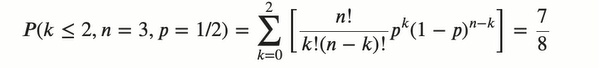

In [5]:
dist = binom(3,0.5)
dist.cdf(2) # función de densidad acumulada (comulative density function)


0.875

# Simulaciones de secuencias con generadores aleatorios

### Los generadores aleatorios tienen como propósito simular muestras de datos que resultan de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [6]:
# Simulación con 100 lanzamiendos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variacion en los resultados)

p = 0.5
n = 3
binomial(n,p)

2

In [7]:
arr = []
for monedas in range(100):
  arr.append(binomial(n,p))

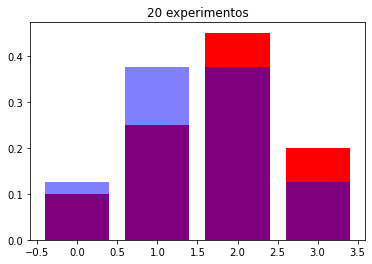

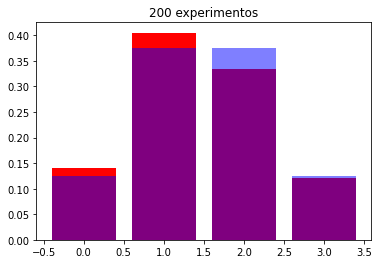

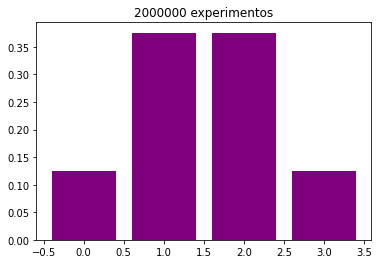

In [9]:
def plot_hist(num_trails):
  values = [0,1,2,3]
  arr = []
  for monedas in range(num_trails):
    arr.append(binomial(n,p))
  sim = np.unique(arr, return_counts= True)[1]/len(arr)
  teorica = [binom(3,0.5).pmf(k) for k in values]
  plt.bar(values, sim, color= "red" )
  plt.bar(values, teorica, alpha = 0.5, color= "blue")
  plt.title('{} experimentos'.format(num_trails))
  plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(2000000)


# Distribución normal teorica.

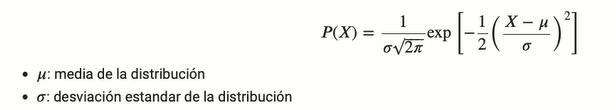

In [10]:
def gaussian(x,mu,sigma):
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

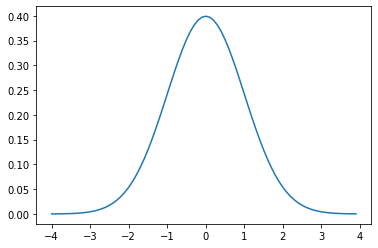

In [11]:
x = np.arange(-4,4,0.1)
y = gaussian(x,0,1)

plt.plot(x,y)

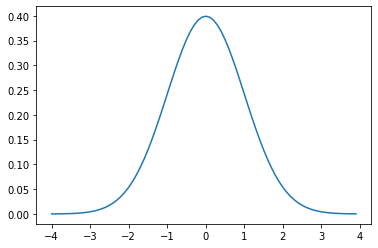

In [12]:
## Gráfica de distribución gaussiana utilizando norm
dist = norm(0,1)
x = np.arange(-4,4,0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x,y)


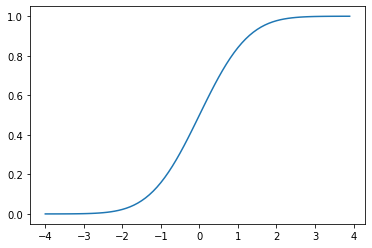

In [13]:
## Cálculo de la integral de la función gaussiana utilizando scipy

dist= norm(0,1)
x = np.arange(-4,4,0.1)
y= [dist.cdf(values) for values in x]
plt.plot(x,y)


# Distribución Normal (Gaussiana) a partir de datos reales

In [14]:
from google.colab import files
uploaded = files.upload()

Saving mosquitos.txt to mosquitos.txt


In [15]:
data = pd.read_csv(io.BytesIO(uploaded['mosquitos.txt']))
data.head()

,Housefly wing lengths
0,36
1,37
2,38
3,38
4,39


<BarContainer object of 20 artists>

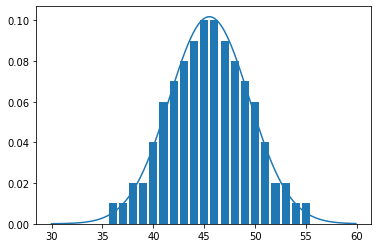

In [16]:
# Estimación paramétrica

mu = data.mean()
sigma = data.std()

x = np.arange(30,60,0.1)
dist = norm(mu,sigma)
y = [dist.pdf(value) for value in x]
plt.plot(x,y)

values, dist = np.unique(data,return_counts=True)
plt.bar(values,dist/len(data))


# Estimación de densidad de probabilidad


In [17]:
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
from scipy.stats import norm

## Estimación paramétrica

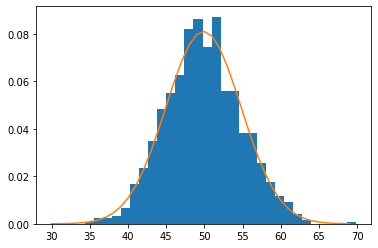

In [18]:
sample = normal(loc=50, scale= 5, size =1000 ) # mu = 50, Sigma = 5
mu = sample.mean()
sigma = sample.std()

dist = norm(mu,sigma)
values = [value for value in range(30,70)]

probabilidades = [dist.pdf(value) for value in values]
pyplot.hist(sample, bins = 30, density = True)
pyplot.plot(values,probabilidades)
pyplot.show()

## Estimación no paramétrica

### Kernel density estimation

parámetro suavizado : smoothing parameter


funtción base : basis funtion



In [19]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

# Construcción de distribución bimodal.

sample1 = normal(loc = 20 , scale = 5 , size = 300)
sample2 = normal(loc= 40 , scale = 5 , size = 700)


sample = hstack((sample1, sample2))

In [20]:
# Creación del modelo 

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample),1))
model.fit(sample)

KernelDensity(bandwidth=2)

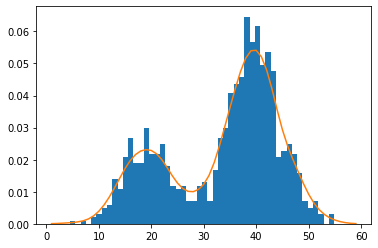

In [21]:
values = np.asarray([value for value in range(1,60)])
values = values.reshape((len(values),1))
probabilities = model.score_samples(values) # probabilidad logaritmica
probabilities = np.exp(probabilities)

pyplot.hist(sample, bins= 50, density = True)
pyplot.plot(values, probabilities)
pyplot.show()

# Regresión logística.

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd


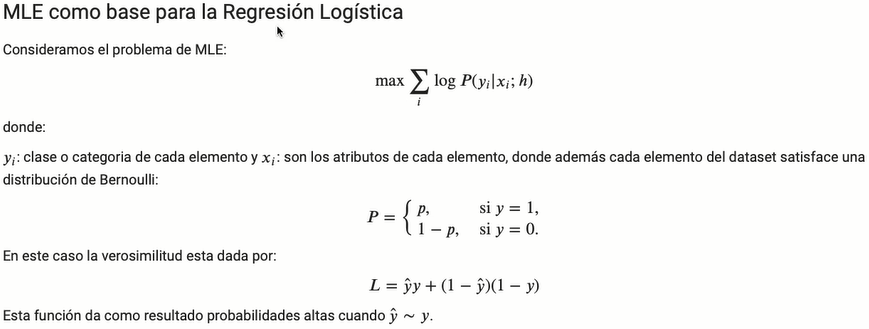

In [30]:
def likelihood(y,yp):
  return yp*y + (1-yp)*(1-y)

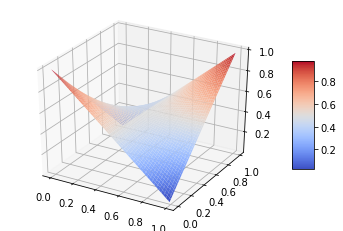

In [31]:
fig = plt.figure()
ax = fig.gca(projection = '3d')

Y = np.arange(0,1,0.01)
YP = np.arange(0,1,0.01) 

Y, YP = np.meshgrid(Y,YP)
Z= likelihood(Y,YP)

surf= ax.plot_surface(Y,YP,Z, cmap=cm.coolwarm)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

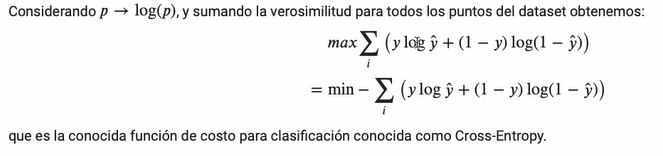

# Regresión logística con Scikit Learn

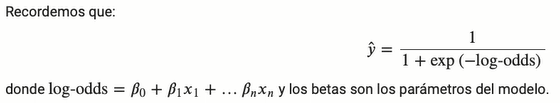

In [32]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [33]:
atrib_names =['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X, y = load_iris(return_X_y=True)

In [34]:
X[:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

In [36]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [38]:
clf = LogisticRegression(random_state=10, solver='liblinear').fit(X[:100],y[:100])

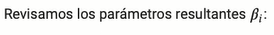

In [40]:
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])